In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from yahooquery import Ticker
from EfficientFrontierTool  import EfficientFrontier

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
#path equals etc... 

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-09-11", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-11", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AAPL", "QQQ", "ARKK", "XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_portfolio.head()

AAPL                                        ARKK  \
                             open     high      low   close    volume    open   
time                                                                            
2018-09-11 00:00:00-04:00  218.01  224.299  216.560  223.86  27700011  46.570   
2018-09-12 00:00:00-04:00  224.94  225.000  219.840  221.06  39249350  47.410   
2018-09-13 00:00:00-04:00  223.52  228.350  222.570  226.40  31575373  47.990   
2018-09-14 00:00:00-04:00  225.75  226.840  222.522  223.64  23562371  48.050   
2018-09-17 00:00:00-04:00  222.15  222.950  217.270  217.89  28375627  48.095   

                                                           ...    XLV         \
                             high      low  close  volume  ...   open   high   
time                                                       ...                 
2018-09-11 00:00:00-04:00  47.480  46.4000  47.46  181333  ...  92.15  92.41   
2018-09-12 00:00:00-04:00  47.659  46.7098  47.56  215033  ...  92.29  92.86   
2018-09-13 00:00:00-04:00  48.429  47.6886  47.93  266565  ...  93.09  93.82   
2018-09-14 00:00:00-04:00  48.600  47.8300  48.24  305215  ...  93.92  93.92   
2018-09-17 00:00:00-04:00  48.340  47.2500  47.28  296228  ...  93.53  93.54   

                                                       XLY                   \
                              low  close    volume    open    high      low   
time                                                                          
2018-09-11 00:00:00-04:00  91.840  92.23   4720964  115.76  117.02  115.555   
2018-09-12 00:00:00-04:00  92.110  92.71  10303166  116.96  117.23  116.180   
2018-09-13 00:00:00-04:00  93.000  93.80   9145883  117.60  117.74  117.110   
2018-09-14 00:00:00-04:00  93.360  93.52   5379127  117.36  117.58  116.440   
2018-09-17 00:00:00-04:00  93.075  93.20   5217575  116.75  116.77  115.370   

                                              
                            close     volume  
time                                          
2018-09-11 00:00:00-04:00  116.94  3875446.0  
2018-09-12 00:00:00-04:00  117.17  4108258.0  
2018-09-13 00:00:00-04:00  117.29  3882439.0  
2018-09-14 00:00:00-04:00  116.93  2878489.0  
2018-09-17 00:00:00-04:00  115.47  4657052.0  

[5 rows x 70 columns]

In [6]:
#df_portfolio.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
port_data = pd.DataFrame()

for c in df_portfolio.columns:
    if c[1] in "close":
        port_data[c[0]] = df_portfolio[c[0]][c[1]]

In [7]:
#clean data & find the daily returns of each stock in the portfolio & ETFs
port_data.index= port_data.index.date

port_data_rt= port_data.pct_change()
port_data_rt= port_data_rt.dropna()

In [8]:
#sep data
etf_tickers= ["XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY"]
etf_data= port_data_rt.loc[:,etf_tickers]
port_data_rt= port_data_rt.drop(columns= etf_tickers)
print(etf_data)


                 XLB       XLC       XLE       XLF       XLI       XLK  \
2018-09-12  0.000507 -0.003108  0.005036 -0.009003  0.003464 -0.003896   
2018-09-13  0.003885  0.006650  0.000271 -0.001425  0.005242  0.011195   
2018-09-14 -0.000337 -0.001239  0.005416  0.006778  0.005469 -0.000534   
2018-09-17  0.003366 -0.009301  0.001481 -0.003189  0.000379 -0.012412   
2018-09-18  0.001174  0.006050  0.006992  0.004088  0.009104  0.005946   
...              ...       ...       ...       ...       ...       ...   
2021-09-03 -0.006864  0.000117 -0.005726 -0.006005 -0.006176  0.003842   
2021-09-07 -0.006443  0.002105 -0.005965 -0.005385 -0.017784  0.000251   
2021-09-08 -0.009551 -0.005369 -0.012828 -0.003301  0.001947 -0.004014   
2021-09-09  0.000476 -0.004694  0.001886  0.002915 -0.004761 -0.004030   
2021-09-10 -0.000357 -0.006496 -0.000209 -0.006869 -0.004783 -0.009674   

                 XLP      XLRE       XLU       XLV       XLY  
2018-09-12  0.011315  0.001487 -0.001107  0.0052

In [9]:
#concat the portfolio into total returns
weights=[1/3, 1/3, 1/3]
weighted_return= (weights * port_data_rt)
portfolio_return = weighted_return.sum(axis=1)
portfolio_return.head()

2018-09-12   -0.004414
2018-09-13    0.014023
2018-09-14   -0.002721
2018-09-17   -0.020005
2018-09-18    0.009320
dtype: float64

In [10]:
#combine the portfolio with etfs to prepare for correlation calc
port_corr= pd.concat([portfolio_return, etf_data], axis="columns", join="inner")
port_corr.head()

,0,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2018-09-12,-0.004414,0.000507,-0.003108,0.005036,-0.009003,0.003464,-0.003896,0.011315,0.001487,-0.001107,0.005204,0.001967
2018-09-13,0.014023,0.003885,0.006650,0.000271,-0.001425,0.005242,0.011195,-0.001273,0.005940,0.008124,0.011757,0.001024
2018-09-14,-0.002721,-0.000337,-0.001239,0.005416,0.006778,0.005469,-0.000534,-0.002368,-0.008562,-0.005128,-0.002985,-0.003069
2018-09-17,-0.020005,0.003366,-0.009301,0.001481,-0.003189,0.000379,-0.012412,0.003652,0.005360,0.002946,-0.003422,-0.012486
2018-09-18,0.009320,0.001174,0.006050,0.006992,0.004088,0.009104,0.005946,-0.004548,-0.005628,-0.002019,0.005472,0.012817


In [11]:
#run correlation
correlation= port_corr.corr()
correlation

,0,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
0,1.000000,0.636591,0.793416,0.474863,0.577609,0.635839,0.867622,0.554698,0.557880,0.428812,0.676829,0.799239
XLB,0.636591,1.000000,0.707875,0.760382,0.873840,0.912671,0.750292,0.720300,0.723539,0.642231,0.758837,0.815162
XLC,0.793416,0.707875,1.000000,0.570411,0.696485,0.723129,0.887080,0.683901,0.654569,0.537891,0.758507,0.860212
XLE,0.474863,0.760382,0.570411,1.000000,0.815917,0.791533,0.562486,0.519997,0.574853,0.456826,0.582059,0.645632
XLF,0.577609,0.873840,0.696485,0.815917,1.000000,0.913759,0.710418,0.705865,0.737096,0.638963,0.728937,0.788404
XLI,0.635839,0.912671,0.723129,0.791533,0.913759,1.000000,0.761996,0.731744,0.752911,0.650088,0.769518,0.842284
XLK,0.867622,0.750292,0.887080,0.562486,0.710418,0.761996,1.000000,0.707457,0.674219,0.566039,0.812732,0.886316
XLP,0.554698,0.720300,0.683901,0.519997,0.705865,0.731744,0.707457,1.000000,0.784972,0.809922,0.797254,0.702570
XLRE,0.557880,0.723539,0.654569,0.574853,0.737096,0.752911,0.674219,0.784972,1.000000,0.826121,0.740112,0.727652
XLU,0.428812,0.642231,0.537891,0.456826,0.638963,0.650088,0.566039,0.809922,0.826121,1.000000,0.705287,0.593612


'\nIndustry=\n    XLB- Materials\n    XLC- Telecommunications \n    XLE- Energy\n    XLF- Financials\n    XLI- Industrials\n    XLK- Information Tech\n    XLP- Consumer Staples\n    XLRE- Real Estate\n    XLU- Utilities\n    XLV- Healthcare\n    XLY- Consumer Discretionary\n'

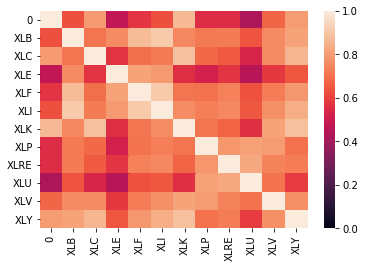

In [12]:
#correlation heatmap
sns.heatmap(correlation, vmin=0, vmax=1)
"""
Industry=
    XLB- Materials
    XLC- Telecommunications 
    XLE- Energy
    XLF- Financials
    XLI- Industrials
    XLK- Information Tech
    XLP- Consumer Staples
    XLRE- Real Estate
    XLU- Utilities
    XLV- Healthcare
    XLY- Consumer Discretionary
"""

In [13]:
#reference the least correlated ETF
less_corr = correlation.iloc[0]
selected_etf= less_corr.loc[less_corr==less_corr.min()].index[0]

In [14]:
#pulling ETF holdings
t = Ticker(selected_etf)
t.fund_holding_info

{'XLU': {'maxAge': 1,
  'stockPosition': 0.9983,
  'bondPosition': 0.0,
  'holdings': [{'symbol': 'NEE',
    'holdingName': 'NextEra Energy Inc',
    'holdingPercent': 0.161},
   {'symbol': 'DUK',
    'holdingName': 'Duke Energy Corp',
    'holdingPercent': 0.0851},
   {'symbol': 'SO', 'holdingName': 'Southern Co', 'holdingPercent': 0.0718},
   {'symbol': 'D',
    'holdingName': 'Dominion Energy Inc',
    'holdingPercent': 0.0665},
   {'symbol': 'EXC',
    'holdingName': 'Exelon Corp',
    'holdingPercent': 0.048499998},
   {'symbol': 'AEP',
    'holdingName': 'American Electric Power Co Inc',
    'holdingPercent': 0.047399998},
   {'symbol': 'SRE', 'holdingName': 'Sempra Energy', 'holdingPercent': 0.0468},
   {'symbol': 'XEL',
    'holdingName': 'Xcel Energy Inc',
    'holdingPercent': 0.0397},
   {'symbol': 'PEG',
    'holdingName': 'Public Service Enterprise Group Inc',
    'holdingPercent': 0.033800002},
   {'symbol': 'WEC',
    'holdingName': 'WEC Energy Group Inc',
    'holdingPe

In [15]:
etf_holdings= t.fund_holding_info["XLU"]['holdings']
etf_holdings

[{'symbol': 'NEE',
  'holdingName': 'NextEra Energy Inc',
  'holdingPercent': 0.161},
 {'symbol': 'DUK',
  'holdingName': 'Duke Energy Corp',
  'holdingPercent': 0.0851},
 {'symbol': 'SO', 'holdingName': 'Southern Co', 'holdingPercent': 0.0718},
 {'symbol': 'D',
  'holdingName': 'Dominion Energy Inc',
  'holdingPercent': 0.0665},
 {'symbol': 'EXC',
  'holdingName': 'Exelon Corp',
  'holdingPercent': 0.048499998},
 {'symbol': 'AEP',
  'holdingName': 'American Electric Power Co Inc',
  'holdingPercent': 0.047399998},
 {'symbol': 'SRE', 'holdingName': 'Sempra Energy', 'holdingPercent': 0.0468},
 {'symbol': 'XEL', 'holdingName': 'Xcel Energy Inc', 'holdingPercent': 0.0397},
 {'symbol': 'PEG',
  'holdingName': 'Public Service Enterprise Group Inc',
  'holdingPercent': 0.033800002},
 {'symbol': 'WEC',
  'holdingName': 'WEC Energy Group Inc',
  'holdingPercent': 0.031400003}]

In [16]:
#pulling tickers from etf holdings (api)
symbols=[]
for i in range(len(etf_holdings)):
    symbols.append(etf_holdings[i]['symbol'])
print(symbols)

['NEE', 'DUK', 'SO', 'D', 'EXC', 'AEP', 'SRE', 'XEL', 'PEG', 'WEC']


In [17]:
#find returns of etf holdings
df_etf = api.get_barset(
    symbols,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


etf_dataDF = pd.DataFrame()

for c in df_etf.columns:
    if c[1] in "close":
        etf_dataDF[c[0]] = df_etf[c[0]][c[1]]

In [18]:
#clean etf holdings data & daily returns
etf_dataDF.index= etf_dataDF.index.date

etf_dataDF= etf_dataDF.pct_change()
etf_dataDF= etf_dataDF.dropna()

In [19]:
#find the sharp ratio of the etf holdings without weights
sharpe_ratios = (etf_dataDF.mean() * 252) / (etf_dataDF.std() * np.sqrt(252))
sharpe_ratios

AEP    0.383245
D      0.233358
DUK    0.428566
EXC    0.285515
NEE    0.031485
PEG    0.337202
SO     0.602165
SRE    0.288870
WEC    0.519006
XEL    0.549087
dtype: float64

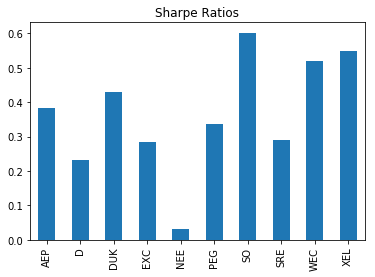

In [20]:
#sharp ratio plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [21]:
#pick out the best stock to add to our portfolio based off of max sharpe ratio from the etf holdings
perfect_stock= sharpe_ratios.loc[sharpe_ratios==sharpe_ratios.max()].index[0]
perfect_stock

'SO'

In [22]:
#get the closing price from our portfolio holdings
port_data
etf_tickers= ["XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY"]
etf_data= port_data.loc[:,etf_tickers]
port_data= port_data.drop(columns= etf_tickers)


In [23]:
#pull api data of perfect stock
picked_stockDF = api.get_barset(
    perfect_stock,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

df_picked = pd.DataFrame()

for c in picked_stockDF.columns:
    if c[1] in "close":
        df_picked[c[0]] = picked_stockDF[c[0]][c[1]]
        
df_picked.index= df_picked.index.date

In [24]:
#append perfect stock to our portfolio
port_data= pd.concat([port_data, df_picked], axis= 'columns', join='inner') 

In [25]:
new_port_dataRT= port_data.pct_change()

new_port_dataRT=new_port_dataRT.dropna()
new_port_dataRT

,AAPL,ARKK,QQQ,SO
2018-09-12,-0.012508,0.002107,-0.002840,-0.001358
2018-09-13,0.024156,0.007780,0.010132,0.003853
2018-09-14,-0.012191,0.006468,-0.002440,-0.008806
2018-09-17,-0.025711,-0.019900,-0.014403,0.010934
2018-09-18,0.001606,0.018190,0.008165,0.009464
...,...,...,...,...
2021-09-03,0.003903,0.001362,0.003076,-0.008823
2021-09-07,0.015488,-0.002560,0.001363,-0.001358
2021-09-08,-0.010083,-0.027747,-0.003350,0.016921
2021-09-09,-0.006576,0.004371,-0.003702,-0.001931


In [26]:
ef = EfficientFrontier(port_data, seed=30, num_portfolios=10000, minWeight=0.001, maxWeight=.4)

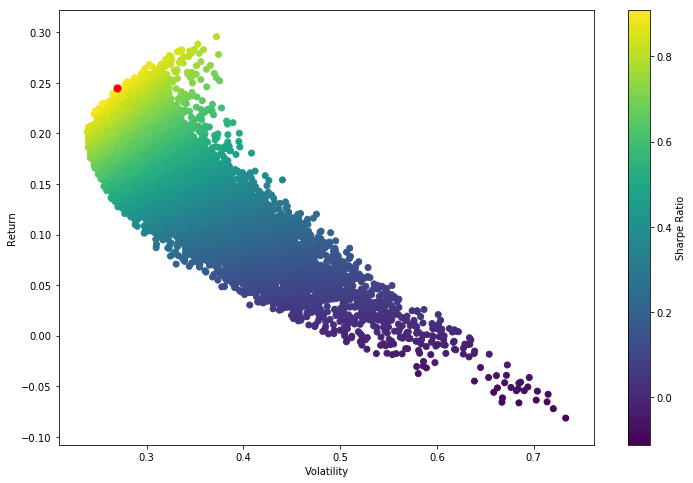

In [27]:
ef.plot_frontier()

In [28]:
#Find the best weights suited for your portfolio's holdings
new_portfolio_weights = ef.best()
new_portfolio_weights

AAPL    0.001000
ARKK    0.371431
QQQ     0.400000
SO      0.227569
dtype: float64

In [29]:
#distributed weights to portfolio holdings
weighted_returns= (new_portfolio_weights * new_port_dataRT)
new_portfolio_return = weighted_returns.sum(axis=1)
new_portfolio_return.head()

2018-09-12   -0.000675
2018-09-13    0.007843
2018-09-14   -0.000590
2018-09-17   -0.010690
2018-09-18    0.012178
dtype: float64

In [30]:
#combine new portfolio assests total returns of portfolio
new_cumprod_port= (1 + new_portfolio_return).cumprod()
new_cumprod_port.head()

2018-09-12    0.999325
2018-09-13    1.007163
2018-09-14    1.006569
2018-09-17    0.995809
2018-09-18    1.007935
dtype: float64

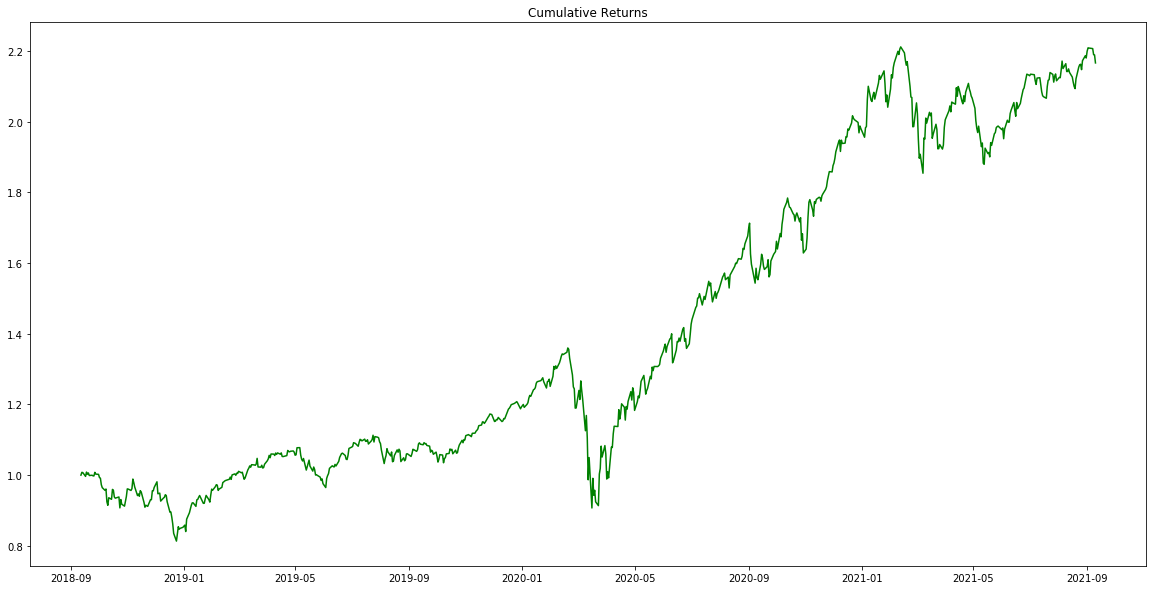

In [31]:
#plot NEW portfolio returns
new_cumprod_port.plot(figsize=(20, 10), title="Cumulative Returns", color= 'green')

In [32]:
###going to use at the end to compare starting returns vs adusted portfolio returns

#cumulative portfolio returns
old_cumprod_port= (1 + portfolio_return).cumprod()
old_cumprod_port.head()

2018-09-12    0.995586
2018-09-13    1.009547
2018-09-14    1.006800
2018-09-17    0.986659
2018-09-18    0.995856
dtype: float64

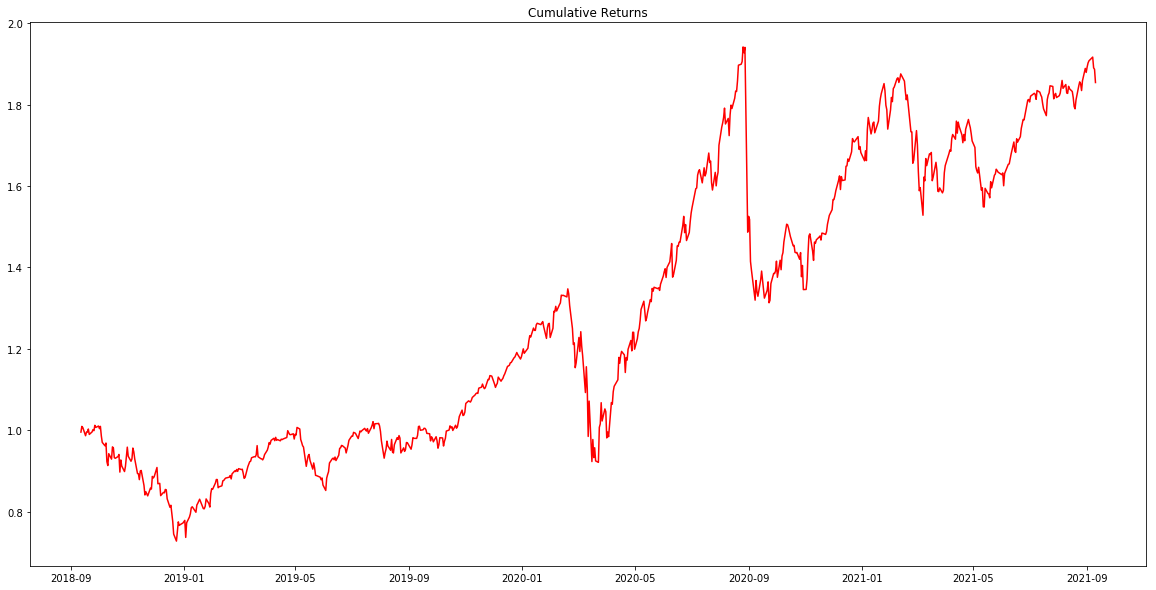

In [33]:
#plot OLD portfolio returns
old_cumprod_port.plot(figsize=(20, 10), title="Cumulative Returns", color= 'red')

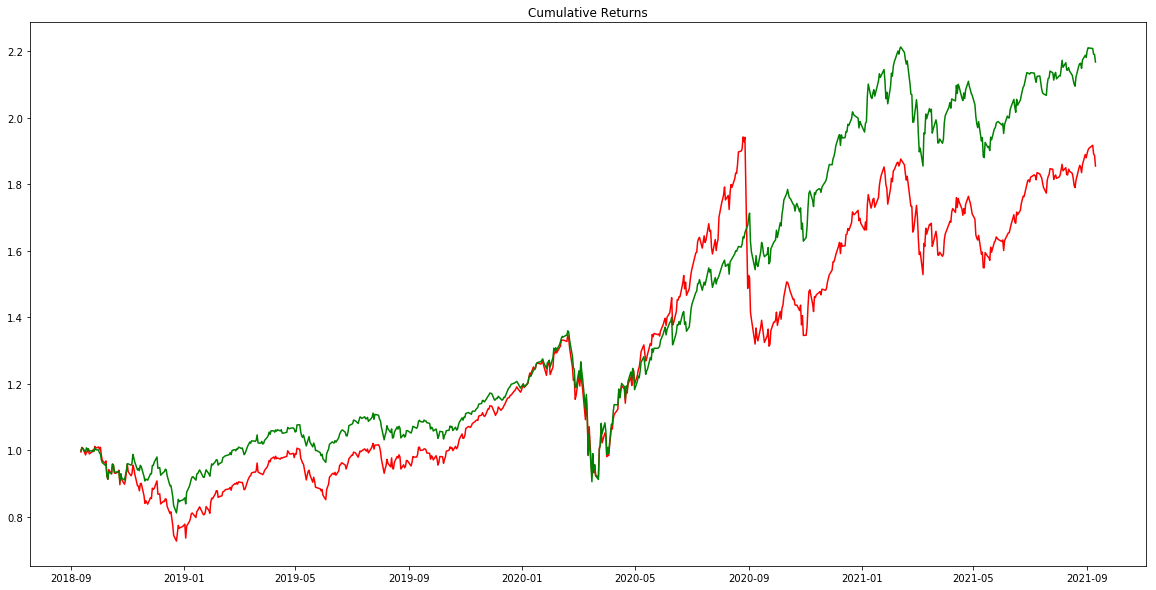

In [34]:
#plot comparing old returns to new adjusted returns
ax = old_cumprod_port.plot(figsize=(20, 10), title="Cumulative Returns", color= 'red')
new_cumprod_port.plot(ax=ax, figsize=(20, 10), title="Cumulative Returns", color= 'green')